# ACNH Clothing Item EDA
Main takeaways for preprocessing:\
Delete columns 
- Name (high cardinality)
- Variation (high cardinality)
- Buy (high correlation with target)

If DIY is used outliers must be kept
outlier percentile threshold = 95%

Fill values
- Mannequin piece - only null for bags, fill with 'No'

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

/Users/rainalex/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('./data/combined_data.csv')

In [4]:
df.head()

,Name,Category,Variation,DIY,Buy,Sell,Color 1,Color 2,Source,Seasonal Availability,Mannequin Piece,Style,Villager Equippable
0,3D glasses,accessories,White,No,490,122,White,Colorful,Able Sisters,All Year,No,Active,Yes
1,3D glasses,accessories,Black,No,490,122,Black,Colorful,Able Sisters,All Year,No,Active,Yes
2,bandage,accessories,Beige,No,140,35,Beige,White,Able Sisters,All Year,Yes,Active,No
3,beak,accessories,Yellow,No,490,122,Yellow,Yellow,Able Sisters,All Year,Yes,Cute,No
4,birthday shades,accessories,Yellow,No,NFS,620,Yellow,Red,Birthday,All Year,No,Gorgeous,Yes


In [5]:
df.dtypes

Name                     object
Category                 object
Variation                object
DIY                      object
Buy                      object
Sell                      int64
Color 1                  object
Color 2                  object
Source                   object
Seasonal Availability    object
Mannequin Piece          object
Style                    object
Villager Equippable      object
dtype: object

In [6]:
df.isna().sum() / len(df)

Name                     0.000000
Category                 0.000000
Variation                0.020608
DIY                      0.000000
Buy                      0.000000
Sell                     0.000000
Color 1                  0.000000
Color 2                  0.000000
Source                   0.000000
Seasonal Availability    0.000000
Mannequin Piece          0.024730
Style                    0.000000
Villager Equippable      0.000000
dtype: float64

In [7]:
df['Name'].nunique()

932

# Sell (Target)
The Sell price distribution is heavily skewed, with a mean of approximately 418 and a maximum value of 80,000. The 95th percentile is 825, indicating that most items sell for relatively modest prices, and a small number of high-priced outliers are inflating the distribution. This may warrant log transformation or outlier handling to improve model performance.

In [8]:
df['Sell'].describe()

count     3882.000000
mean       417.766358
std       1473.206366
min         10.000000
25%        220.000000
50%        315.000000
75%        450.000000
max      80000.000000
Name: Sell, dtype: float64

In [9]:
df['Sell'].quantile(0.95)

825.0

In [10]:
threshold = df['Sell'].quantile(0.95)
df[df['Sell'] <= threshold].shape

(3691, 13)

Text(0.5, 1.0, 'Log Scaled Sale Value')

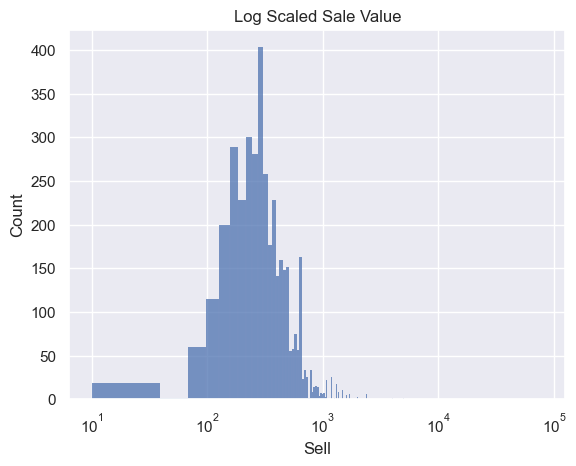

In [11]:
sns.histplot(df, x='Sell')
plt.xscale('log')
plt.title('Log Scaled Sale Value')

In [12]:
no_outlier_df = df[df['Sell'] <= threshold]
outlier_df = df[df['Sell'] > threshold]

# Buy
Excluding the outliers, Buy and Sell are very highly correlated. Buy may be dropped in training, especially if the outliers are getting dropped

In [13]:
df_copy = df
df_copy['Buy'] = df_copy['Buy'].replace('NFS', 0)

In [14]:
df_copy[['Buy', 'Sell']].corr()

,Buy,Sell
Buy,1.000000,0.104636
Sell,0.104636,1.000000


In [15]:
df_copy[df_copy['Sell'] <= threshold][['Buy', 'Sell']].corr()

,Buy,Sell
Buy,1.000000,0.956529
Sell,0.956529,1.000000


In [16]:
df_copy.dtypes

Name                     object
Category                 object
Variation                object
DIY                      object
Buy                      object
Sell                      int64
Color 1                  object
Color 2                  object
Source                   object
Seasonal Availability    object
Mannequin Piece          object
Style                    object
Villager Equippable      object
dtype: object

In [17]:
df_copy['Buy'] = df_copy['Buy'].astype(int)

Text(0.5, 1.0, 'Buy vs Sale Value')

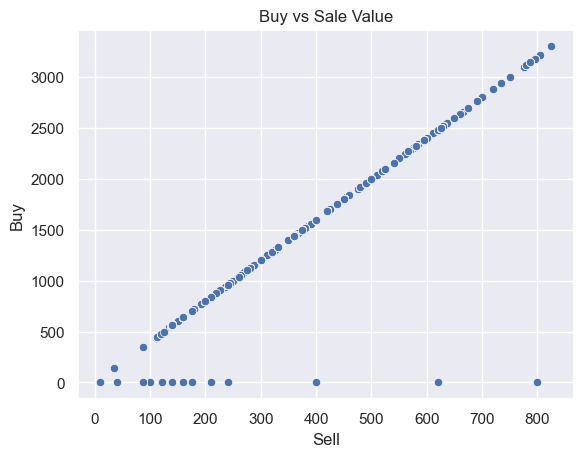

In [18]:
tmp = df_copy[df_copy['Sell'] <= threshold]
sns.scatterplot(data=tmp, x='Sell', y='Buy')
plt.title('Buy vs Sale Value')

# Color vs Variation
Variation seems more detailed but Color 1 and Color 2 have low cardinality, serving as a good replacement for Variation as a whole when used together. Variation can be dropped.

In [19]:
df['Variation'].unique()

array(['White', 'Black', 'Beige', 'Yellow', 'Pink', 'Red', 'Blue',
       'Purple', 'Green', 'Brown', 'Gray', 'Orange', 'Navy blue',
       'Silver', 'Gold', 'Pasta', 'Avocado', 'Twilight', 'Midnight',
       'Passion', 'Ocean', 'Sunset', 'Love', 'Light blue', 'Magenta',
       'Mustard', 'Baby purple', 'Baby mint', 'Baby yellow', 'Baby green',
       'Baby pink', 'Baby gray', 'Baby blue', 'Baby orange', 'Ochre',
       'Light brown', 'Dark brown', 'Lime', 'Berry red', nan, 'Ivory',
       'Pop', 'Cool', 'M', 'Flowers', 'Polka dots',
       'Colorful quilt design', 'Cherries', 'Denim with stripes',
       'Forest print', 'Chick', 'Camel', 'Tiger', 'Zebra', 'Peacock blue',
       'Peach', 'Aquamarine', 'Light gray', 'Blue & red', 'Black & blue',
       'Black & red', 'Black & yellow', 'Red & green', 'Orange & red',
       'Green & purple', 'Purple & pink', 'Mint', 'Ruby red', 'Turquoise',
       'Cyan', 'Yellow-green', 'Rainbow', 'Pastel', 'Light green',
       'Light purple', 'Dark red

In [20]:
df['Color 1'].unique()

array(['White', 'Black', 'Beige', 'Yellow', 'Pink', 'Red', 'Light blue',
       'Purple', 'Green', 'Blue', 'Brown', 'Gray', 'Colorful', 'Orange'],
      dtype=object)

In [21]:
df['Color 2'].unique()

array(['Colorful', 'White', 'Yellow', 'Red', 'Pink', 'Green', 'Purple',
       'Blue', 'Black', 'Gray', 'Light blue', 'Orange', 'Brown', 'Beige'],
      dtype=object)

In [22]:
df[df['Variation'] == 'Rainbow'][['Variation', 'Color 1', 'Color 2']]

,Variation,Color 1,Color 2
799,Rainbow,Purple,Colorful
1184,Rainbow,Colorful,Colorful


In [23]:
df[df['Variation'] == 'Zebra'][['Variation', 'Color 1', 'Color 2']]

,Variation,Color 1,Color 2
321,Zebra,Gray,Black
2776,Zebra,Gray,Black


In [24]:
df[df['Variation'] == '1'][['Variation', 'Color 1', 'Color 2']]

,Variation,Color 1,Color 2
3679,1,Red,White


In [25]:
df[df['Variation'] == '2'][['Variation', 'Color 1', 'Color 2']]

,Variation,Color 1,Color 2
3680,2,Blue,White


In [26]:
df[df['Variation'] == 'Baby blue'][['Variation', 'Color 1', 'Color 2']]

,Variation,Color 1,Color 2
140,Baby blue,Purple,Purple
1082,Baby blue,Blue,Blue


# Color 1 & Color 2
Black and White appear to be the most common secondary colors \ 
overall, the color combinations don't seem to have much of an effect on the sell price

In [27]:
co_occurences = pd.crosstab(df['Color 1'], df['Color 2'])

Text(0.5, 1.0, 'Color 1 & 2 - Paired Occurences')

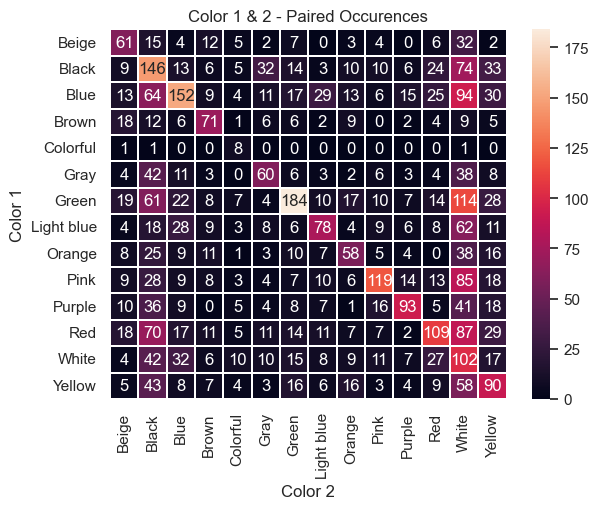

In [28]:
sns.heatmap(co_occurences, linewidth=.1, annot=True, fmt='g')
plt.title('Color 1 & 2 - Paired Occurences')

Text(0.5, 1.0, 'Value Distribution by Color 1')

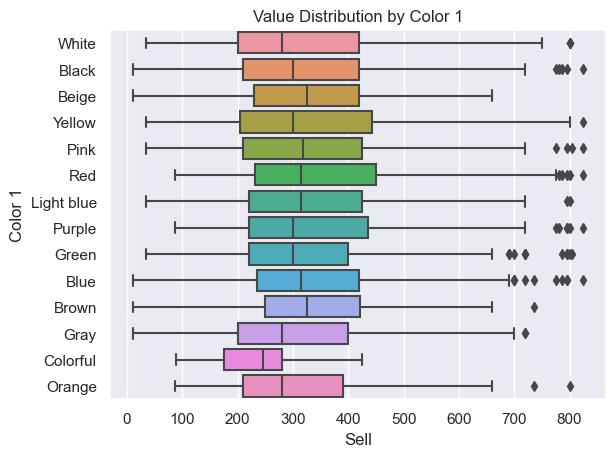

In [29]:
sns.boxplot(no_outlier_df, x='Sell', y='Color 1')
plt.title('Value Distribution by Color 1')

Text(0.5, 1.0, 'Value Distirbution by Color 2')

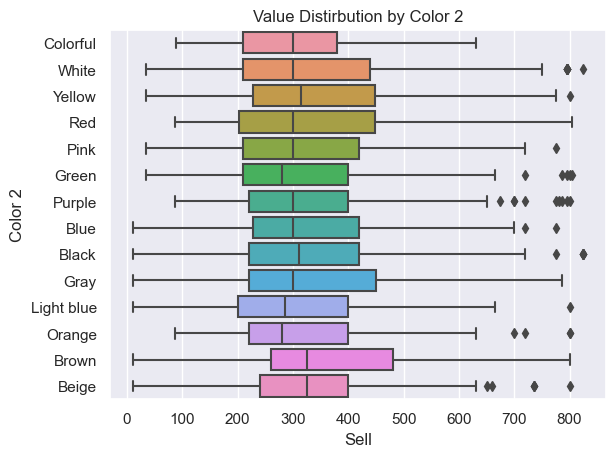

In [30]:
sns.boxplot(no_outlier_df, x='Sell', y='Color 2')
plt.title('Value Distirbution by Color 2')

Text(0.5, 1.0, 'Mean Value by Color Pairing')

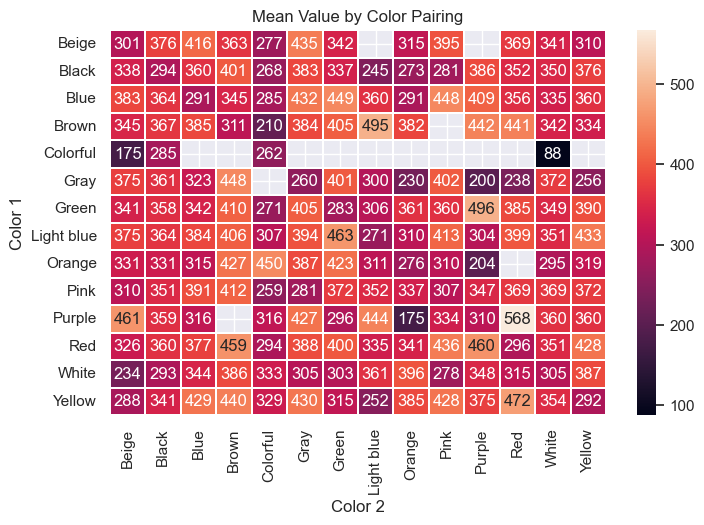

In [31]:
tmp = no_outlier_df.pivot_table(index='Color 1', columns='Color 2', values='Sell', aggfunc='mean')
plt.figure(figsize=(8, 5))
sns.heatmap(tmp, linewidths=.2, annot=True, fmt='.0f')

plt.title('Mean Value by Color Pairing')

# Category
dresses/outfits tend to be more expensive, socks are cheap, and everything else hovers between 200 and 400 bells

In [32]:
df['Category'].value_counts()

Category
tops           1121
dresses         913
bottoms         726
shoes           454
socks           350
accessories     222
bags             96
Name: count, dtype: int64

Text(0.5, 1.0, 'Value by Category')

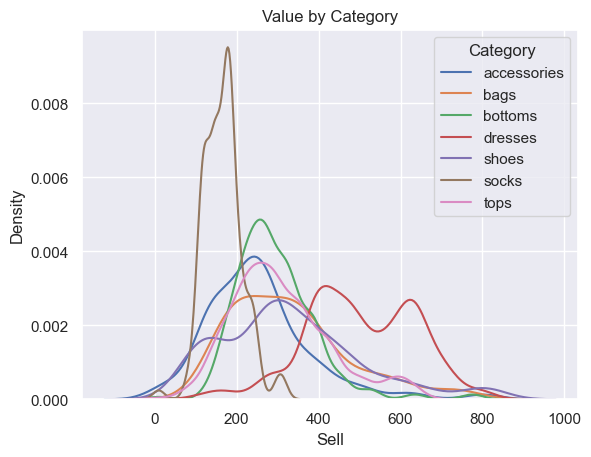

In [33]:
# sns.kdeplot(no_outlier_df, x='Sell', hue='Category')
for cat in df['Category'].unique():
    sns.kdeplot(no_outlier_df[no_outlier_df['Category'] == cat], x='Sell', label=cat)
plt.legend(title='Category')
plt.title('Value by Category')

Text(0.5, 1.0, 'Value Distribution by Category')

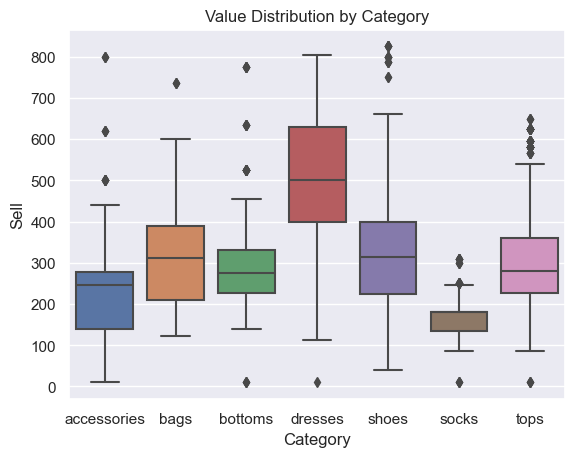

In [34]:
sns.boxplot(no_outlier_df, y='Sell', x='Category')
plt.title('Value Distribution by Category')

# Style
For the most part style does not really affect sell price (between 200 and 400 bells). The gorgeous and elegant styles however tend to skew towards prices over 600 bells which makes sense, these are "fancier" clothes.

In [35]:
df['Style'].value_counts()

Style
Simple      1239
Active       882
Cute         618
Elegant      552
Cool         360
Gorgeous     231
Name: count, dtype: int64

Text(0.5, 1.0, 'Value by Style')

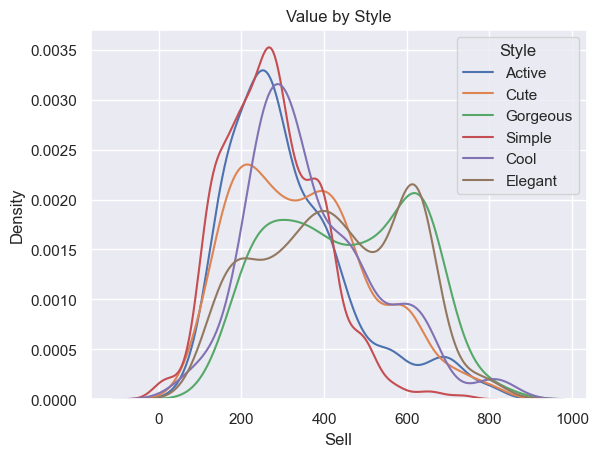

In [36]:
# sns.kdeplot(no_outlier_df, x='Sell', hue='Style')
for style in df['Style'].unique():
    sns.kdeplot(no_outlier_df[no_outlier_df['Style'] == style], x='Sell', label=style)
plt.legend(title='Style')
plt.title('Value by Style')

Text(0.5, 1.0, 'Value Distribution by Style')

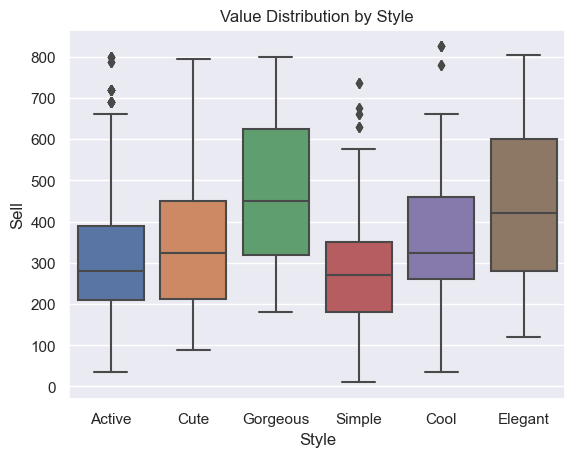

In [37]:
sns.boxplot(no_outlier_df, y='Sell', x='Style')
plt.title('Value Distribution by Style')

Text(0.5, 1.0, 'Category & Style - Paired Occurences')

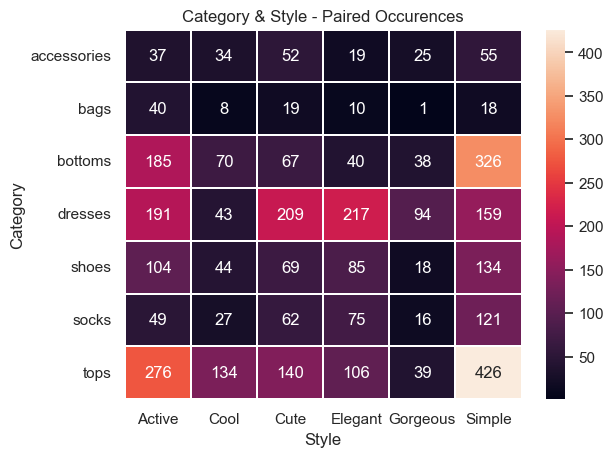

In [38]:
co_occ_cat_style = pd.crosstab(df['Category'], df['Style'])
sns.heatmap(co_occ_cat_style, linewidths=.2, annot=True, fmt='g')
plt.title('Category & Style - Paired Occurences')

Text(0.5, 1.0, 'Mean Value by Category & Style Pairing')

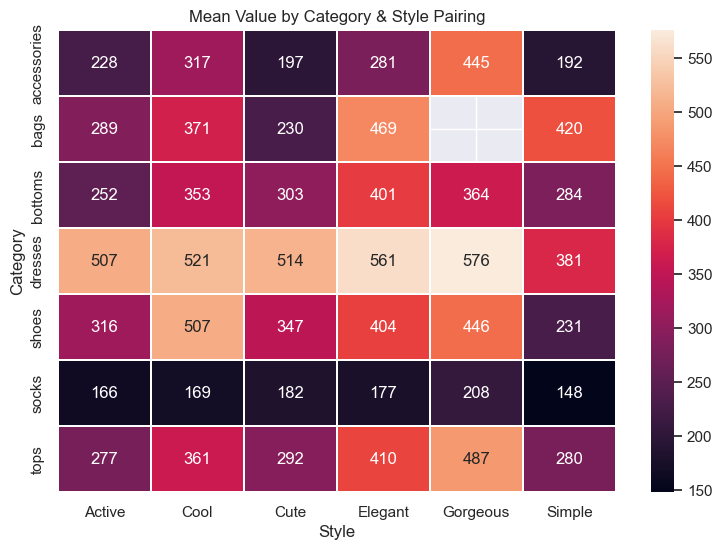

In [39]:
tmp = no_outlier_df.pivot_table(index='Category', columns='Style', values='Sell', aggfunc='mean')
plt.figure(figsize=(9, 6))
sns.heatmap(tmp, linewidths=.2, annot=True, fmt='.0f')
plt.title('Mean Value by Category & Style Pairing')

# Source
Labelle skews towards higher sell prices, which makes sense Labelle is designer ;). Crafting also skews higher as well. It turns out that crafting is just DIY items. \
Recycle Bin is low because it is basically trash. Birthday, Gulliver, and Wedding Season are likely higher because they are rare

In [40]:
df['Source'].value_counts()

Source
Able Sisters                    3403
Kicks                            273
Labelle                           60
Nook Shopping Catalog             37
Crafting                          37
Mom                               24
Recycle bin                       11
Nook Miles Shop                    9
Dodo Airlines                      7
Birthday                           4
Wedding Season                     4
Bug-Off                            3
Fishing Tourney                    3
Gulliver                           3
Nook Shopping Promotion            2
International Children's Day       1
Winter Solstice Festival           1
Name: count, dtype: int64

Text(0.5, 1.0, 'Value Distribution by Source')

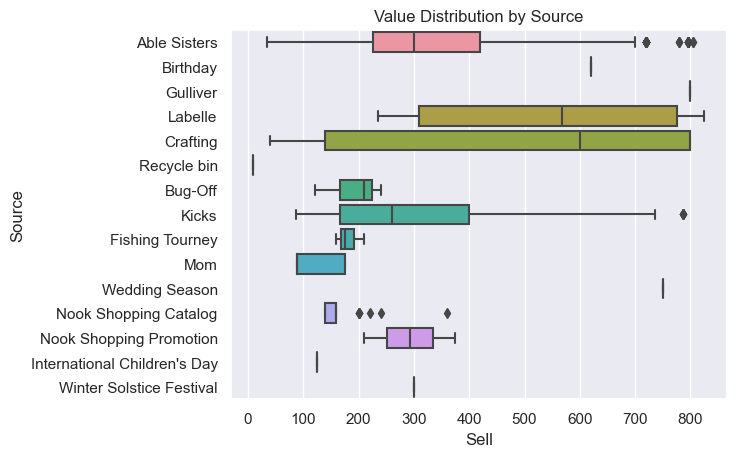

In [41]:
sns.boxplot(no_outlier_df, x='Sell', y='Source')
plt.title('Value Distribution by Source')

In [42]:
df[df['Source'] == 'Crafting'].shape, df[df['DIY'] == 'Yes'].shape

((37, 13), (37, 13))

In [43]:
df[(df['Source'] == 'Crafting') & (df['DIY'] == 'Yes')].shape

(37, 13)

# Seasonal Availability
Most items are available all year. Across seasons however, winter clothing is slightly more valuable. \
Summer and Winter also provide the most seasonally-exclusive items

In [44]:
df['Seasonal Availability'].value_counts()

Seasonal Availability
All Year    2939
Summer       490
Winter       429
Spring        14
Fall          10
Name: count, dtype: int64

Text(0.5, 1.0, 'Value Distribution by Seasonal Availability')

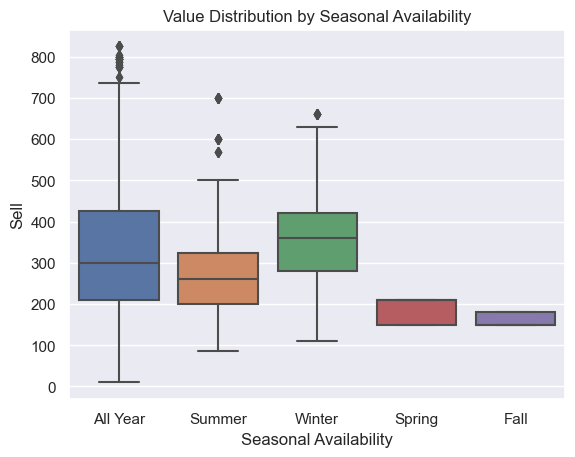

In [46]:
sns.boxplot(no_outlier_df, y='Sell', x='Seasonal Availability')
plt.title('Value Distribution by Seasonal Availability')

Text(0.5, 1.0, 'Seasonal Availability & Category - Paired Occurences')

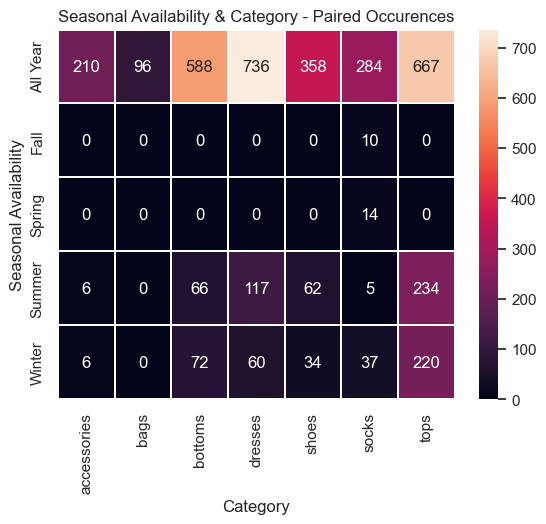

In [47]:
no_occ_seas_cat = pd.crosstab(df['Seasonal Availability'], df['Category'])
sns.heatmap(no_occ_seas_cat, linewidths=.2, annot=True, fmt='g')
plt.title('Seasonal Availability & Category - Paired Occurences')

Text(0.5, 1.0, 'Seasonal Availability & Style - Paired Occurences')

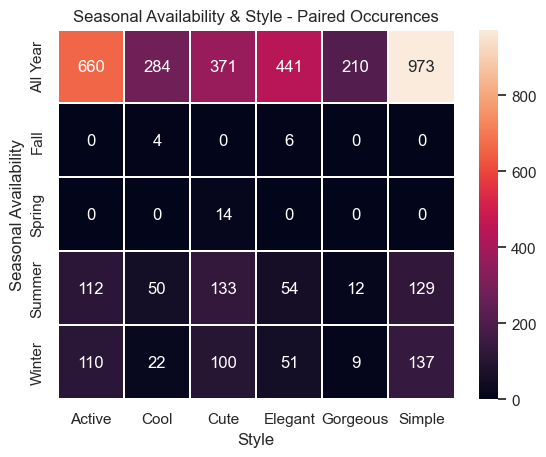

In [48]:
no_occ_seas_style = pd.crosstab(df['Seasonal Availability'], df['Style'])
sns.heatmap(no_occ_seas_style, linewidths=.2, annot=True, fmt='g')
plt.title('Seasonal Availability & Style - Paired Occurences')

# Mannequin Piece
Mannequin Piece is only null for bags category. So those will be filled with 'No'.
It also appears to not really play a role in sell price

In [49]:
df[df['Mannequin Piece'].isna()]

,Name,Category,Variation,DIY,Buy,Sell,Color 1,Color 2,Source,Seasonal Availability,Mannequin Piece,Style,Villager Equippable
222,acorn pochette,bags,Brown,Yes,0,2400,Brown,Green,Crafting,All Year,NaN,Cute,No
223,basket pack,bags,Green,Yes,0,2400,Green,Green,Crafting,All Year,NaN,Simple,No
224,bug cage,bags,Green,No,0,122,Green,White,Bug-Off,All Year,NaN,Active,No
225,Bunny Day bag,bags,NaN,Yes,0,2400,Colorful,Colorful,Crafting,All Year,NaN,Active,No
226,butterfly backpack,bags,Pink,No,0,210,Pink,Yellow,Bug-Off,All Year,NaN,Cute,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,travel pouch,bags,Light blue,No,840,210,Light blue,Black,Kicks,All Year,NaN,Active,No
314,travel pouch,bags,Purple,No,840,210,Purple,Black,Kicks,All Year,NaN,Active,No
315,traveler's backpack,bags,Orange,No,2940,735,Orange,Beige,Kicks,All Year,NaN,Simple,No
316,traveler's backpack,bags,Blue,No,2940,735,Blue,Beige,Kicks,All Year,NaN,Simple,No


In [50]:
len(df[df['Category'] == 'bags'])

96

In [51]:
df[['Category', 'Mannequin Piece']].value_counts().sort_index()

Category     Mannequin Piece
accessories  No                  172
             Yes                  50
bottoms      No                  654
             Yes                  72
dresses      No                  882
             Yes                  31
shoes        No                  368
             Yes                  86
socks        No                  311
             Yes                  39
tops         No                 1036
             Yes                  85
Name: count, dtype: int64

Text(0.5, 1.0, 'Value Distribution by Mannequin Piece')

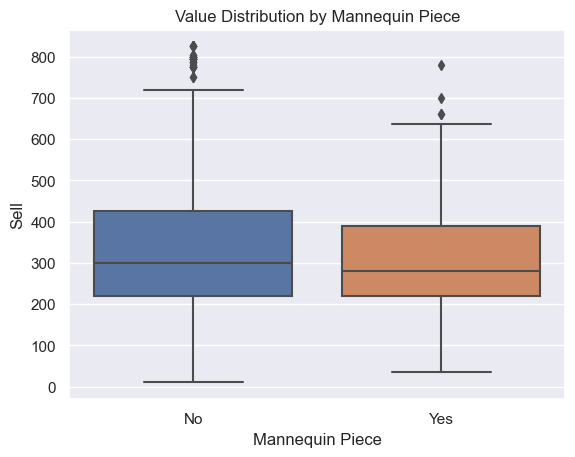

In [52]:
sns.boxplot(no_outlier_df.dropna(subset='Mannequin Piece'), y='Sell', x='Mannequin Piece')
plt.title('Value Distribution by Mannequin Piece')

Text(0.5, 1.0, 'Sell Value Distribution by Category (Mannequin vs Non-Mannequin Items)')

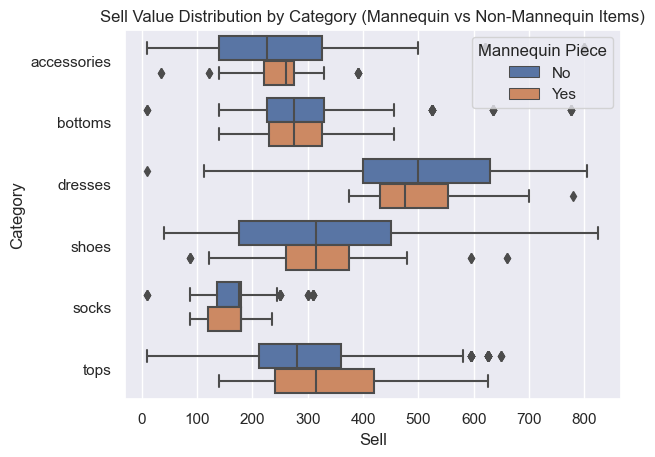

In [53]:
sns.boxplot(no_outlier_df.dropna(subset='Mannequin Piece'), x='Sell', y='Category', hue='Mannequin Piece')
plt.title('Sell Value Distribution by Category (Mannequin vs Non-Mannequin Items)')

Text(0.5, 1.0, 'Sell Value Distribution by Style (Mannequin vs Non-Mannequin Items)')

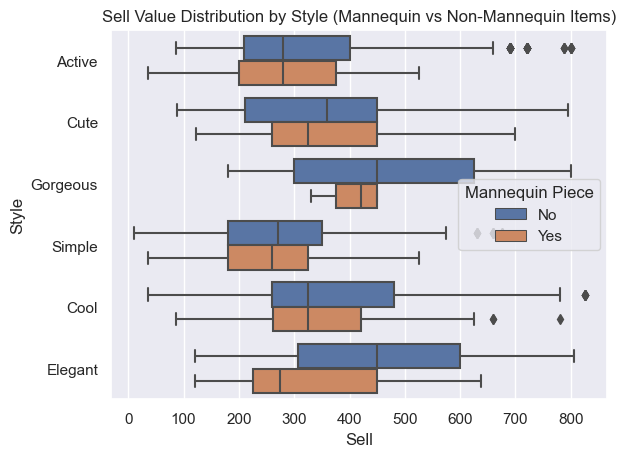

In [54]:
sns.boxplot(no_outlier_df.dropna(subset='Mannequin Piece'), x='Sell', y='Style', hue='Mannequin Piece')
plt.title('Sell Value Distribution by Style (Mannequin vs Non-Mannequin Items)')

# DIY
Very few DIY items, but the items that are DIY tend to be in the top percentile (>95%) of sell prices. There may be a need to compare training with and without outliers, especially if DIY is used for training. \
DIY shoes and gorgeous DIY items sell very high (> 10,000 bells)

In [55]:
df[df['DIY'] == 'Yes'][['Sell','DIY']]

,Sell,DIY
109,100,Yes
222,2400,Yes
223,2400,Yes
225,2400,Yes
228,2400,Yes
264,400,Yes
265,960,Yes
266,2400,Yes
296,10800,Yes
297,2400,Yes


Text(0.5, 0.98, 'Sell Value by DIY Status')

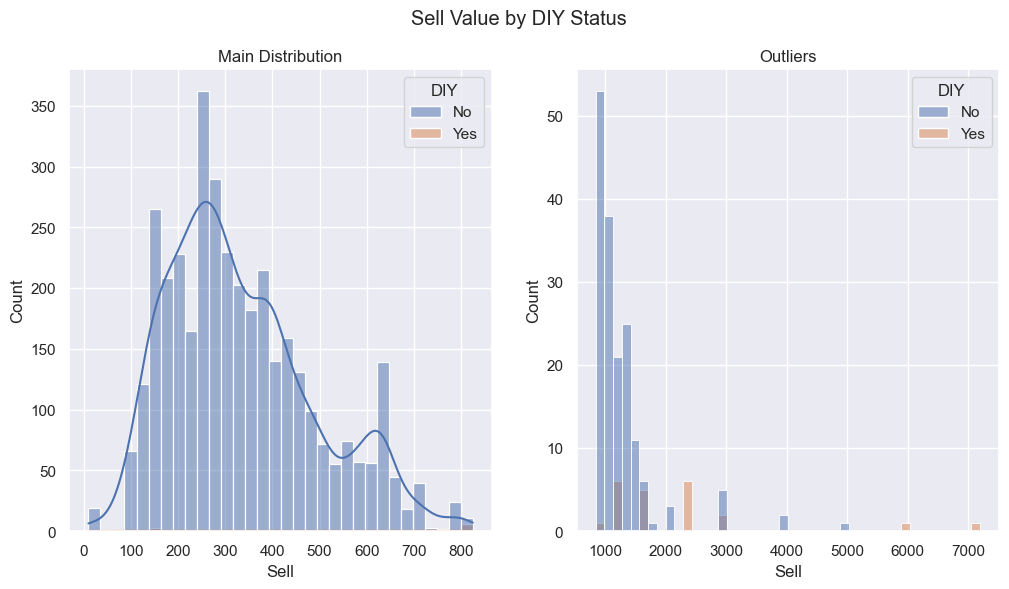

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(no_outlier_df, x='Sell', hue='DIY', kde=True, ax=ax1)
sns.histplot(df[(df['Sell'] > threshold) & (df['Sell'] < 10000)], x='Sell', hue='DIY', ax=ax2)
ax1.set_title('Main Distribution')
ax2.set_title('Outliers')
plt.suptitle('Sell Value by DIY Status')

Text(0.5, 1.0, 'Value Distribution by Category - Outliers (DIY vs Non-DIY)')

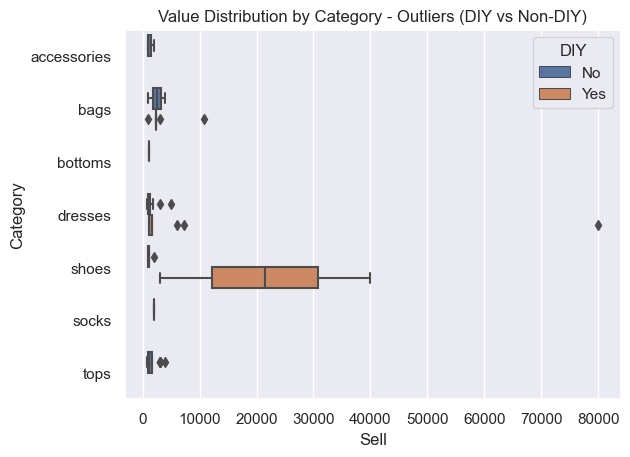

In [61]:
sns.boxplot(outlier_df, x='Sell', y='Category', hue='DIY')
plt.title('Value Distribution by Category - Outliers (DIY vs Non-DIY)')

Text(0.5, 1.0, 'Value Distribution by Style - Outliers (DIY vs Non-DIY)')

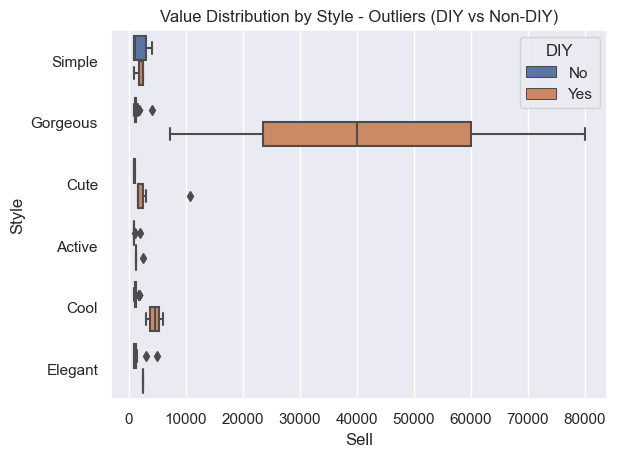

In [62]:
sns.boxplot(outlier_df, x='Sell', y='Style', hue='DIY')
plt.title('Value Distribution by Style - Outliers (DIY vs Non-DIY)')

# Villager Equippable
**Can a villager wear or hold it?** \
Items that can be equipped by villagers sell slightly higher \
Villagers also don't really wear shoes or pants, hence why those are the categories along with socks and bags, that are not equippable by them

In [171]:
df['Villager Equippable'].value_counts()

Villager Equippable
Yes    2204
No     1678
Name: count, dtype: int64

Text(0.5, 1.0, 'Value Distribution by Villager Equippable Status')

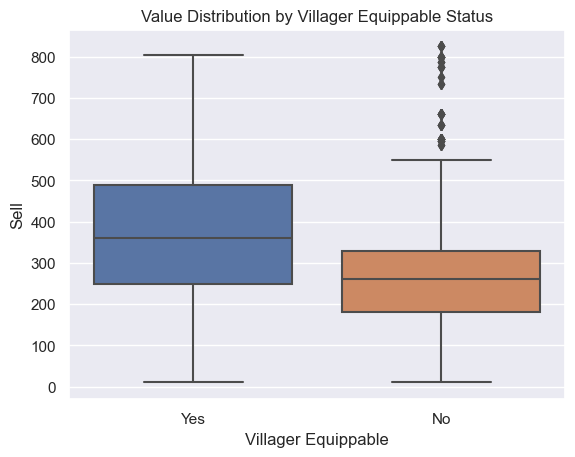

In [63]:
sns.boxplot(no_outlier_df, x='Villager Equippable', y='Sell')
plt.title('Value Distribution by Villager Equippable Status')

Text(0.5, 1.0, 'Villager Equippable & Category - Pairing Occurences')

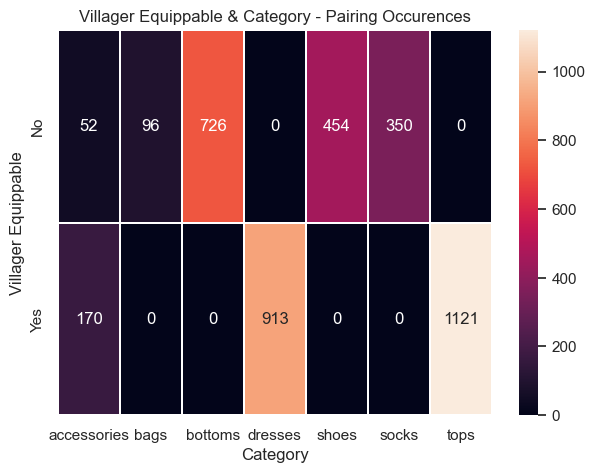

In [64]:
co_occ_vill_cat = pd.crosstab(df['Villager Equippable'], df['Category'])
plt.figure(figsize=(7,5))
sns.heatmap(co_occ_vill_cat, linewidths=.2, annot=True, fmt='g')
plt.title('Villager Equippable & Category - Pairing Occurences')